In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/busebahadir/Desktop/A:B Testing/digital_marketing_dataset.csv')

In [3]:
data.head()

,UserID,Group,Age,Gender,Location,Device,PageViews,ClickThroughRate,SessionDuration,FrequencyOfVisits,...,Purchases,FormSubmissions,NetPromoterScore,MostActiveTimeOfDay,ContentConsumed,UserJourneyPathway,FeatureInteraction,LayoutVariation,ColorScheme,CTAButton
0,1,Test,62,Female,North America,Tablet,4,0.731815,7.448806,3,...,0,0,6,Morning,Lifestyle,Ad Click,None,Layout 1,Scheme 1,Button A
1,2,Test,65,Female,Europe,Mobile,7,0.811036,4.455856,4,...,0,0,-2,Night,Entertainment,Homepage,Feature A,Layout 1,Scheme 1,Button A
2,3,Test,18,Female,Europe,Desktop,5,0.176856,4.816883,6,...,0,1,-6,Morning,Entertainment,Direct,None,Layout 1,Scheme 1,Button A
3,4,Test,21,Female,North America,Tablet,11,0.905315,3.772111,1,...,0,0,0,Night,Educational,Direct,Feature B,Layout 1,Scheme 1,Button A
4,5,Test,21,Other,North America,Tablet,4,0.428069,10.471592,5,...,0,0,-9,Afternoon,Lifestyle,Homepage,None,Layout 1,Scheme 1,Button A


In [13]:
data.isnull().sum()

UserID                 0
Group                  0
Age                    0
Gender                 0
Location               0
Device                 0
PageViews              0
ClickThroughRate       0
SessionDuration        0
FrequencyOfVisits      0
LastVisitDate          0
SignUps                0
Downloads              0
Purchases              0
FormSubmissions        0
NetPromoterScore       0
MostActiveTimeOfDay    0
ContentConsumed        0
UserJourneyPathway     0
FeatureInteraction     0
LayoutVariation        0
ColorScheme            0
CTAButton              0
Turnover_Score         0
dtype: int64

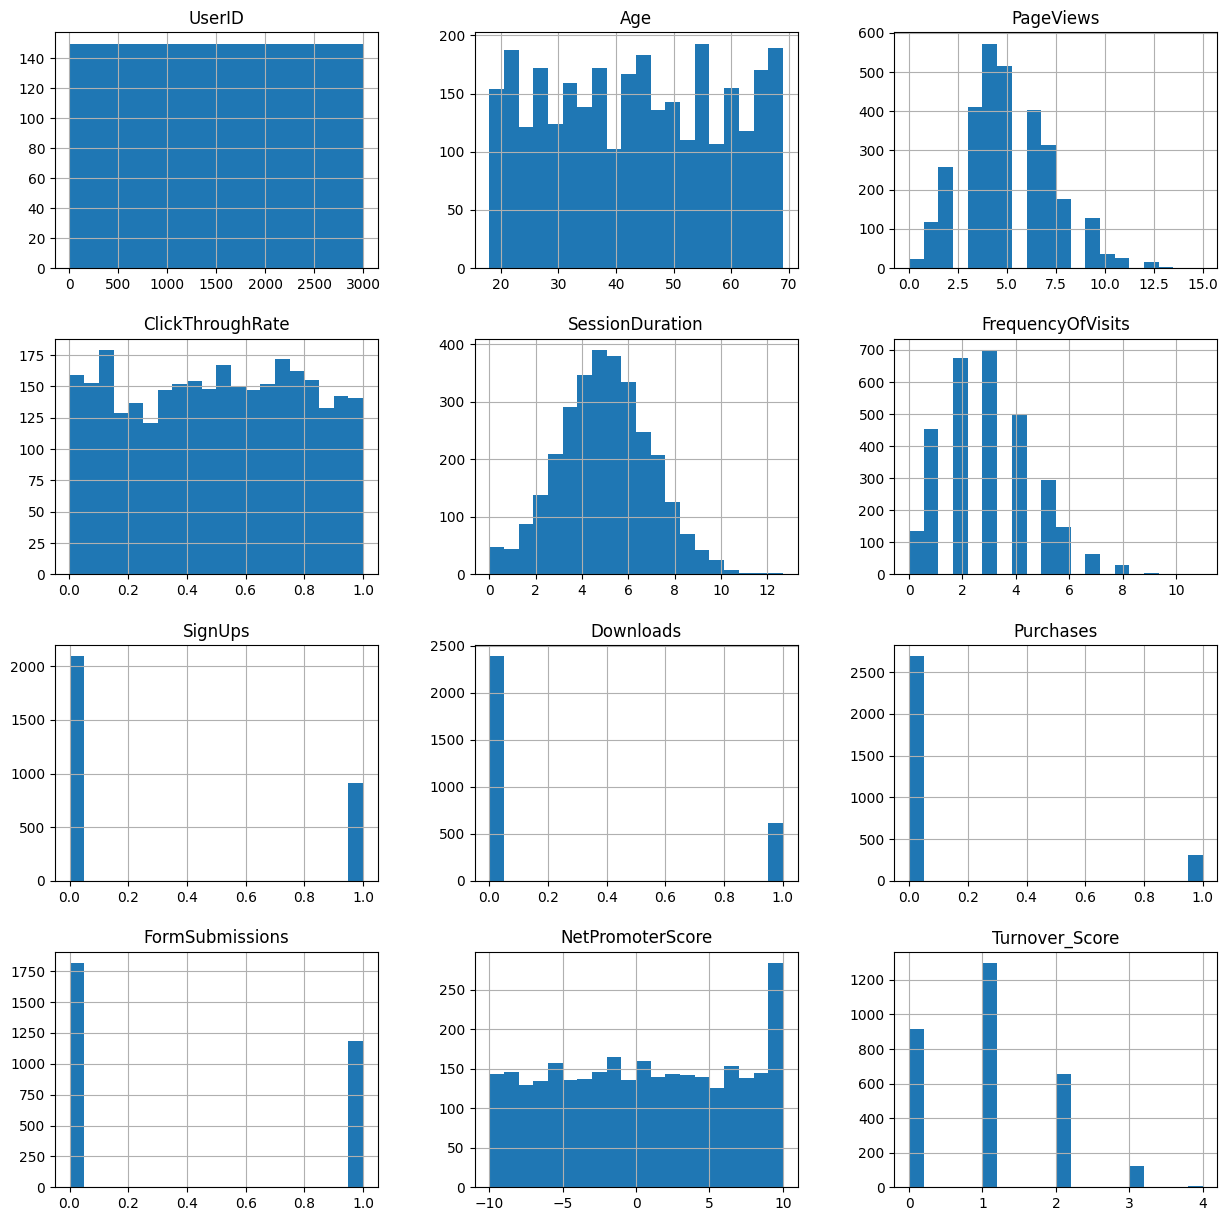

In [15]:
# Lets see the general distrubition of the numerical variables
axList = data.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

In [4]:
#Check if ChatGPT correctly split the two A/B groups
data.groupby('Group')[['UserID']].count()

,UserID
Group,
Control,1500
Test,1500


In [5]:
#See if there are significant differences in the distribution of device types.
device_type = data['Device'].value_counts()

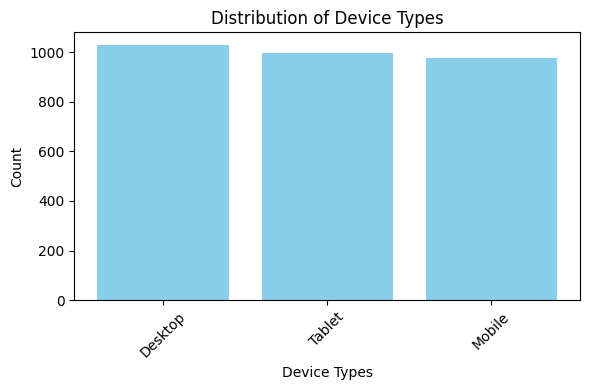

In [6]:
plt.figure(figsize=(6, 4))
plt.bar(device_type.index, device_type.values, color='skyblue')
plt.xlabel('Device Types')
plt.ylabel('Count')
plt.title('Distribution of Device Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
#Before analyzing each success metric seperately, let's look at their total as Turnover Score in a seperate column
data['Turnover_Score'] = data['SignUps'] + data['Downloads'] + data['FormSubmissions']+ data['Purchases']

The focus of this analysis will be on how the CTA Button and Color Schema affects turnover, but just for fun, let's check if device, consumed content or journey path type causes changes in turnover scores.

In [8]:
data.groupby('Device')[['Turnover_Score']].mean()

,Turnover_Score
Device,
Desktop,1.007782
Mobile,0.987705
Tablet,1.017068


In [9]:
data.groupby('ContentConsumed')[['Turnover_Score']].mean()

,Turnover_Score
ContentConsumed,
Educational,1.035433
Entertainment,1.010485
Lifestyle,0.993351
News,0.976487


In [10]:
data.groupby('UserJourneyPathway')[['Turnover_Score']].mean()

,Turnover_Score
UserJourneyPathway,
Ad Click,0.978378
Direct,1.035620
Homepage,1.004011
Search,0.998674


In [12]:
#Let's look at how turnover rates differ between the two A/B groups.
data.groupby('Group').agg({"UserID":"count", "PageViews":"mean","ClickThroughRate":"mean", "SignUps":"sum", "Downloads":"sum", "FormSubmissions":"sum", "Purchases":"sum", "Turnover_Score":"mean"})

,UserID,PageViews,ClickThroughRate,SignUps,Downloads,FormSubmissions,Purchases,Turnover_Score
Group,,,,,,,,
Control,1500,4.955333,0.494293,444,321,580,152,0.998000
Test,1500,4.911333,0.503663,464,290,603,159,1.010667


Turnover score is slightly better for the Test group, signaling a potential success of Button B and Scheme 2. However, these changes have negative results for the number of Downloads. It's a small change, but even small changes can have a large impact. But while we are certain of the difference in the data, how certain should we be that Downloads will be worse in the future if we continue with Button B and Scheme 2?

There are a couple of ways we can get at the certainty of these numbers. Next, we will use bootstrapping.